In [1]:
# import the needed libraries to track the time and space complexity of an algrithm 
import matplotlib.pyplot as plt
%matplotlib inline
from time import perf_counter
import random
from guppy import hpy

<h2>Task 1:</h2>

- get the time and space complexity of the binary search algorithm 

In [2]:
# binary search takes in an array (arr) and a value (k) and returns true if k is in arr, and false otherwise 
def binary_search(arr, k):
    """
    Cut the array into halves and look for k
    """
    # pointer0 refers to the index of the first element in the list
    pointer0 = 0
    # pointer1 refers to the index of the last element of the list
    pointer1 = len(arr) - 1
    while pointer0 <= pointer1:
        # mid points to track the middle element of the list
        mid = pointer0 + (pointer1 - pointer0) // 2
        if arr[mid] == k:
            return True
        # if k is greater than the mid number, we move pointer0 to the mid point
        elif arr[mid] < k:
            pointer0 = mid + 1
        # if k is less than the mid number, we move pointer1 to the mid point
        else:
            pointer1 = mid - 1
    return False

In [4]:
# Calculating the time needed to excute binary_search fun

# create a list with a range of 10000 elements
l = list(range(10000))

# start time point
start = perf_counter()

# calling the binary search function and giving it a list of all numbers between 0: 10000
binary_search(l, 0)

# end time point
end = perf_counter()

# getting the execution time
tot_time = (end - start) / 1000
print("Time it took to run the alg = {} ms".format(tot_time))

Time it took to run the alg = 1.0609999999999786e-07 ms


In [7]:
# Calculating the space needed to excute binary_search fun

# creating an object of guppy class
mem = hpy()

# start counting the space used
mem.setrelheap()

# calling the binarry search function to find 0 in l
binary_search(l, 0)

# end of counting space used  
mem = mem.heap()

# change the space used output message to be a string type
mem = repr(mem)

# split the mem string to a list
mem = mem.split()

# extracting the total memory used string from the mem list
print("Total space used = {} bytes".format(mem[10]))

Total space used = 2329 bytes


<h2>task2:</h2> 

- Inplement those following:
    - Find the maximum value in a list 
    - Make each letter in a string lowercase
    - Sort a list of integers (using the inbuilt python method)
- For each of the above algorithms, plot graphs showing how the time and space taken as the input size changes from length 1 to length 100. (Lengths of lists and lengths of strings). You don’t need all values - just a few is enough.
- Estimate how long each algorithm would take for for inputs of size 1,000,000. Write your estimate clearly in the code.


In [8]:
# sort_arr sorts an array in ascending Order
def sort_arr(arr):
    return sorted(arr)

In [9]:
# max_arr gets the max value from an array of integers
def max_arr(arr):
    return max(arr)

In [10]:
# lower_case transforms a string letters to lower case
def lower_case(word):
    return word.lower()

In [11]:
def plotTime(f, minArg, maxArg):
    """
    Run timer and plot time complexity
    """
    len_input = []
    t = []
    space = []
    for i in range(minArg, maxArg):
        if f == lower_case:
            # string of capital As of length i
            l_input = "A" * i
        else:
            # randomize an array of length i with values from 0 to 100
            l_input = random.sample(range(100), i)
        # time start point
        start = perf_counter()
        # calling the function
        f(l_input)
        # time end point
        end = perf_counter()
        # appending the len of the input and time it took to run
        len_input.append(i)
        t.append((end - start) / 1000)
    return len_input, t

In [12]:
def size_million(f):
    """
    estimating the time needed to excute f giving input of 1,000,000 elements
    """
    # check if the function given is lower case which accepts strings only  
    if f == lower_case:
        # populate l_input with a string of length 1000000
        l_input = "A" * 1000000
    else:
        # poulate l_input with a list of 1000000 elements
        l_input = random.sample(range(1000000), 1000000)
    start = perf_counter()
    f(l_input)
    end = perf_counter()
    return end - start

Analyzing Algorithms...


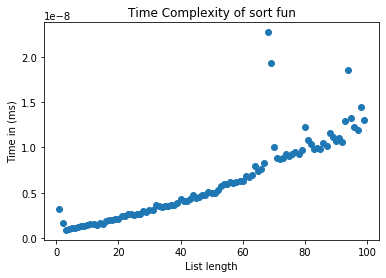

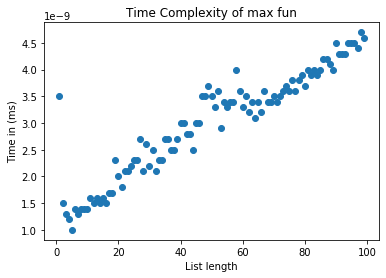

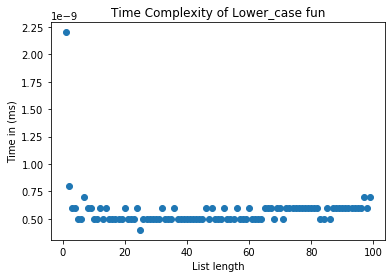

---------------------------------------------------------------------------
Time to sort an array of length million= 0.7137358000000091 sec
Time to find max number of an array of length million= 0.10093750000000057 sec
Time to lower a string length million= 0.0014994999999942138 sec


In [13]:
# Calc and plot time complexity of the sort, lower, max python functions
def main():
    print('Analyzing Algorithms...')
    # calling the plotTime function and give it a function name, min, max values
    len_input, t = plotTime(sort_arr, 1, 100)
    # plot the output
    plt.plot(len_input, t, 'o')
    # title of the plot
    plt.title("Time Complexity of sort fun")
    # naming x axis
    plt.xlabel("List length")
    # naming y axis
    plt.ylabel("Time in (ms)")
    plt.show()

    len_input, t = plotTime(max_arr, 1, 100)
    plt.plot(len_input, t, 'o')
    plt.title("Time Complexity of max fun")
    plt.xlabel("List length")
    plt.ylabel("Time in (ms)")
    plt.show()

    len_input, t = plotTime(lower_case, 1, 100)
    plt.plot(len_input, t, 'o')
    plt.title("Time Complexity of Lower_case fun")
    plt.xlabel("List length")
    plt.ylabel("Time in (ms)")
    plt.show()

    # task 3; estimating the time it will take to execute input of length million
    print("---------------------------------------------------------------------------")
    print("Time to sort an array of length million= {} sec".format(size_million(sort_arr)))
    print("Time to find max number of an array of length million= {} sec".format(size_million(max_arr)))
    print("Time to lower a string length million= {} sec".format(size_million(lower_case)))


if __name__ == '__main__':
    main()

Analyzing Algorithms...


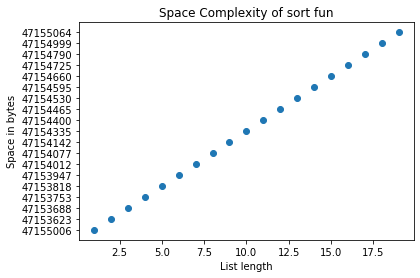

In [14]:
# Calc and plot space complexity of the sort python functions when the input grows from 1 to 20
def spaceOfSort():
    print('Analyzing Algorithms...')
    # input_ind is a list that tracks the index, space tracks the spaces used by the sort function
    input_ind = []
    space = []
    for i in range(1, 20):
        l_input = random.sample(range(100), i)
        h = hpy()
        sort_arr(l_input)
        h = h.heap()
        h = repr(h)
        h = h.split()
        input_ind.append(i)
        space.append(h[10])
        
    # plot the output
    plt.plot(input_ind, space, 'o')
    # title of the plot
    plt.title("Space Complexity of sort fun")
    # naming x axis
    plt.xlabel("List length")
    # naming y axis
    plt.ylabel("Space in bytes")
    plt.show()

# calling spaceOfSort
spaceOfSort()